In [43]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pandas matplotlib seaborn


In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Display the first few rows of the dataset
print(df.head())

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

In [5]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

              Year  \
count  6420.000000   
mean   2004.500000   
std       8.656116   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                                   
mean                                            0.266604                                   
std                                             0.039383                                   
min                                             0.188416                                   
25%                                             0.242267                                   
50%                                             0.273477                                   
75%                                             0.286575                                   
max                                             0.462045         

In [7]:
print(df.columns)


Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the actual column names in your DataFrame
print(df.columns)

# 1. Check for typos and case sensitivity:
#    - Ensure 'Prevalence' is typed correctly and matches the case in the DataFrame.
#    - If the column name has spaces, use df['Column Name with Spaces'].

# 2. Check for column existence:
#    - Print the list of columns using `print(df.columns)` and verify if 'Prevalence' is present.
#    - If not present, check your data source for the correct column name.

# 3. If extra whitespace is suspected:
#    - Clean the column names using:
#

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')


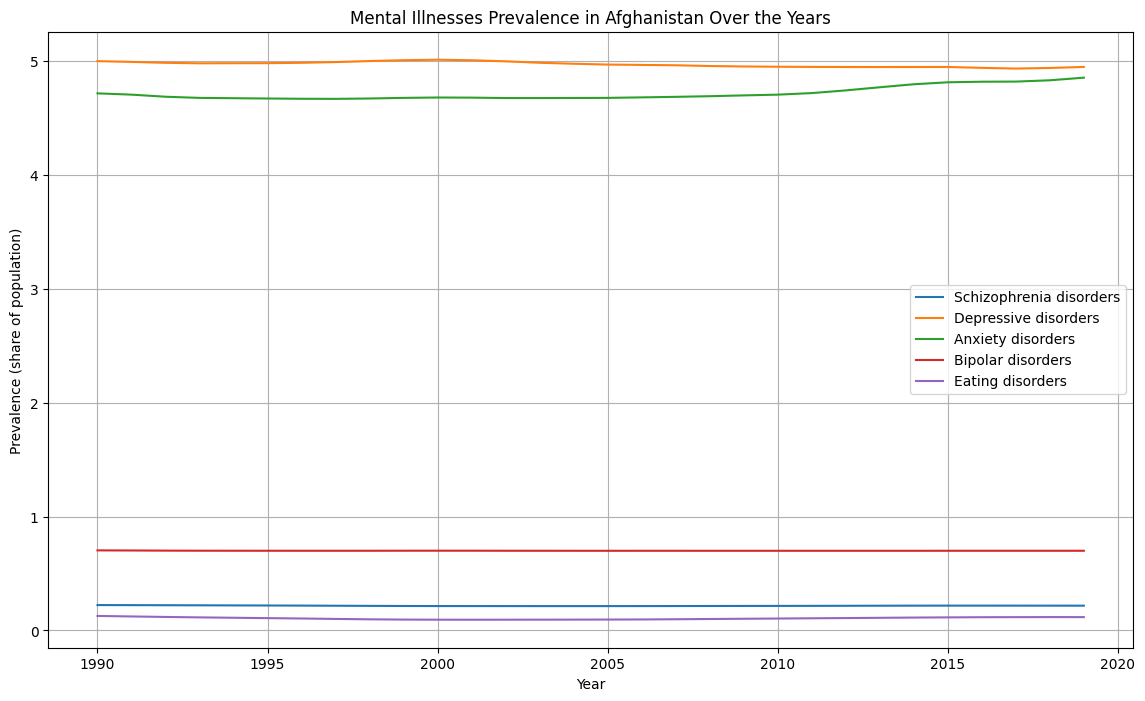

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Plotting the data
plt.figure(figsize=(14, 8))

# Plotting Schizophrenia disorders prevalence over the years for a specific country (e.g., Afghanistan)
country = 'Afghanistan'
country_data = df[df['Entity'] == country]

plt.plot(country_data['Year'], country_data['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Schizophrenia disorders')
plt.plot(country_data['Year'], country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Depressive disorders')
plt.plot(country_data['Year'], country_data['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Anxiety disorders')
plt.plot(country_data['Year'], country_data['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Bipolar disorders')
plt.plot(country_data['Year'], country_data['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Eating disorders')

plt.xlabel('Year')
plt.ylabel('Prevalence (share of population)')
plt.title(f'Mental Illnesses Prevalence in {country} Over the Years')
plt.legend()
plt.grid(True)
plt.show()

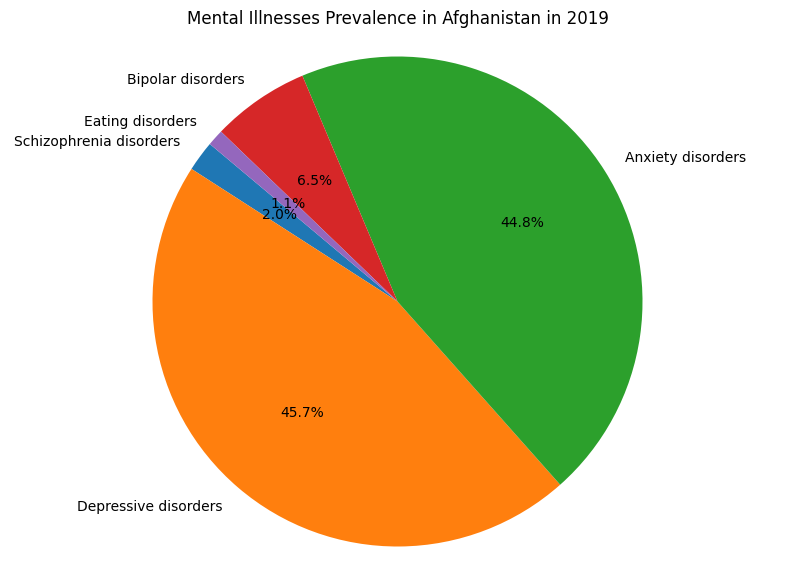

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Summarize the data for a specific year (e.g., 2019) and specific country (e.g., Afghanistan)
year = 2019
country = 'Afghanistan'
country_data = df[(df['Entity'] == country) & (df['Year'] == year)]

# Extract the values for the pie chart
labels = ['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']
sizes = [
    country_data['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0]
]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Mental Illnesses Prevalence in {country} in {year}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

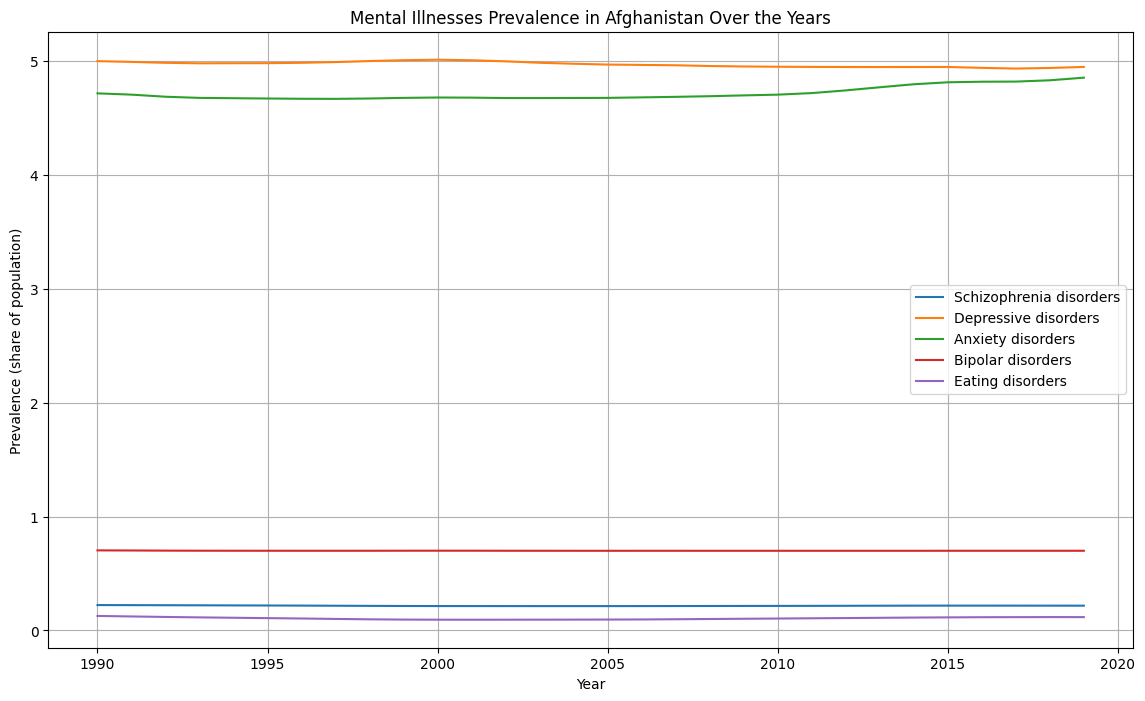

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Plotting the data
plt.figure(figsize=(14, 8))

# Plotting Schizophrenia disorders prevalence over the years for a specific country (e.g., Afghanistan)
country = 'Afghanistan'
country_data = df[df['Entity'] == country]

plt.plot(country_data['Year'], country_data['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Schizophrenia disorders')
plt.plot(country_data['Year'], country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Depressive disorders')
plt.plot(country_data['Year'], country_data['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Anxiety disorders')
plt.plot(country_data['Year'], country_data['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Bipolar disorders')
plt.plot(country_data['Year'], country_data['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Eating disorders')

plt.xlabel('Year')
plt.ylabel('Prevalence (share of population)')
plt.title(f'Mental Illnesses Prevalence in {country} Over the Years')
plt.legend()
plt.grid(True)
plt.show()

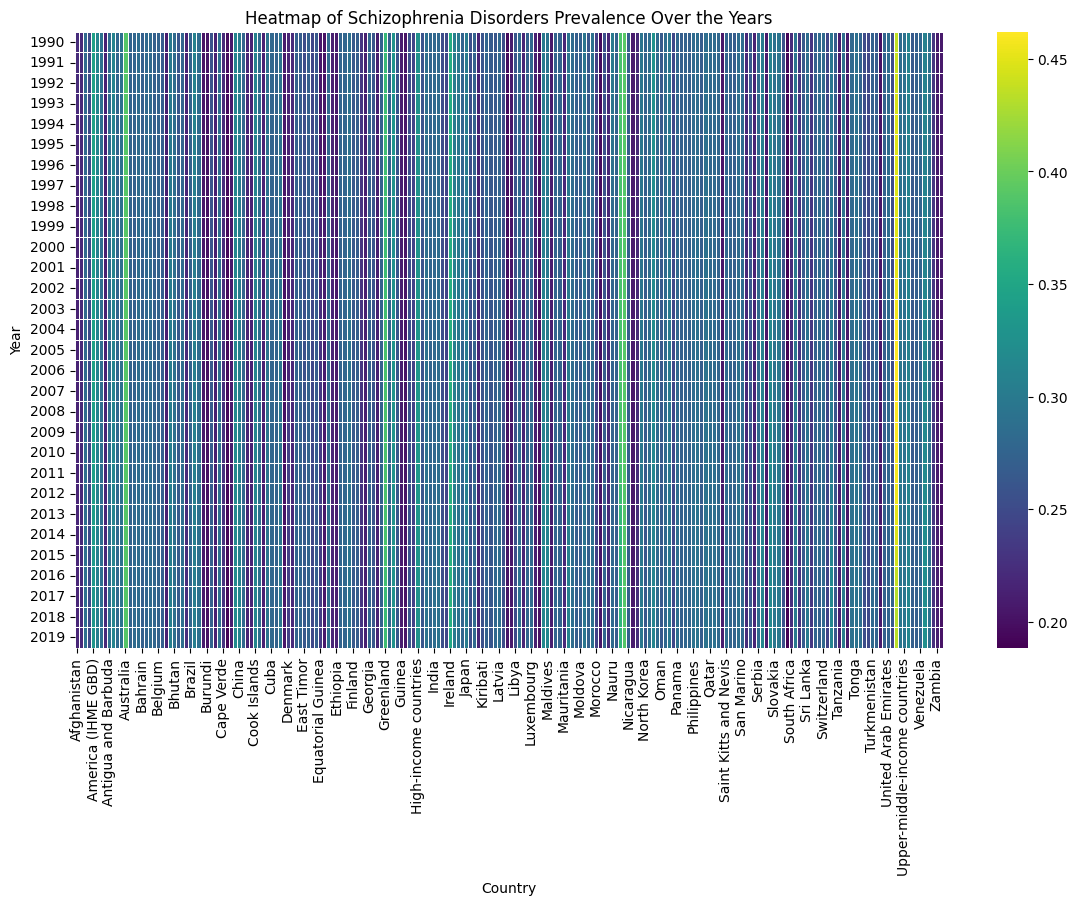

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Pivot the data to create a matrix for the heatmap
heatmap_data = df.pivot_table(index='Year', columns='Entity', values='Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Schizophrenia Disorders Prevalence Over the Years')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Preprocess the data
# For simplicity, let's focus on predicting the prevalence of depressive disorders based on the year and country code

# Select relevant columns
data = df[['Year', 'Code', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Drop rows with missing values
data = data.dropna()

# Encode categorical variable 'Code' using one-hot encoding
data = pd.get_dummies(data, columns=['Code'])

# Split the data into features (X) and target (y)
X = data.drop('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', axis=1)
y = data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.017904227653555368
R-squared: 0.9808485541990207


In [25]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model (Strategic Regression)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Preprocess the data
# For simplicity, let's focus on predicting the prevalence of depressive disorders based on the year and country code

# Select relevant columns
data = df[['Year', 'Code', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Drop rows with missing values
data = data.dropna()

# Encode categorical variable 'Code' using one-hot encoding
data = pd.get_dummies(data, columns=['Code'])

# Split the data into features (X) and target (y)
X = data.drop('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', axis=1)
y = data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model (Strategic Regression)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Preprocess the data
# For simplicity, let's focus on predicting the prevalence of depressive disorders based on the year and country code

# Select relevant columns
data = df[['Year', 'Code', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Drop rows with missing values
data = data.dropna()

# Encode categorical variable 'Code' using one-hot encoding
data = pd.get_dummies(data, columns=['Code'])

# Split the data into features (X) and target (y)
X = data.drop('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', axis=1)
y = data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model (Strategic Regression)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Preprocess the data
# For simplicity, let's focus on predicting the prevalence of depressive disorders based on the year and country code

# Select relevant columns
data = df[['Year', 'Code', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]

# Drop rows with missing values
data = data.dropna()

# Encode categorical variable 'Code' using one-hot encoding
data = pd.get_dummies(data, columns=['Code'])

# Split the data into features (X) and target (y)
X = data.drop('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', axis=1)
y = data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model (Strategic Regression)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.019655489809547795
R-squared: 0.9789752981774389
Mean Squared Error: 0.019655489809547795
R-squared: 0.9789752981774389
Mean Squared Error: 0.019655489809547795
R-squared: 0.9789752981774389


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Preprocess the data
data = df[['Year', 'Code', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]
data = data.dropna()
data = pd.get_dummies(data, columns=['Code'])

# Split the data into features (X) and target (y)
X = data.drop('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', axis=1)
y = data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.019655489809547795
R-squared: 0.9789752981774389


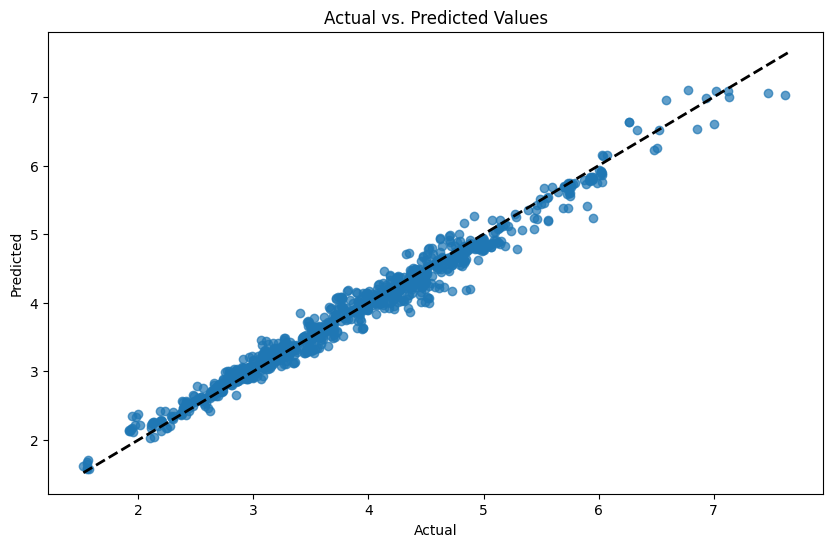

In [37]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Preprocess the data
data = df[['Year', 'Code', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']]
data = data.dropna()
data = pd.get_dummies(data, columns=['Code'])

# Split the data into features (X) and target (y)
X = data.drop('Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', axis=1)
y = data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate accuracy (for regression, we can use R-squared as a measure of accuracy)
accuracy = r2

print(f"Mean Squared Error: {mse}")
print(f"R-squared (Accuracy): {accuracy}")

Mean Squared Error: 0.019655489809547795
R-squared (Accuracy): 0.9789752981774389


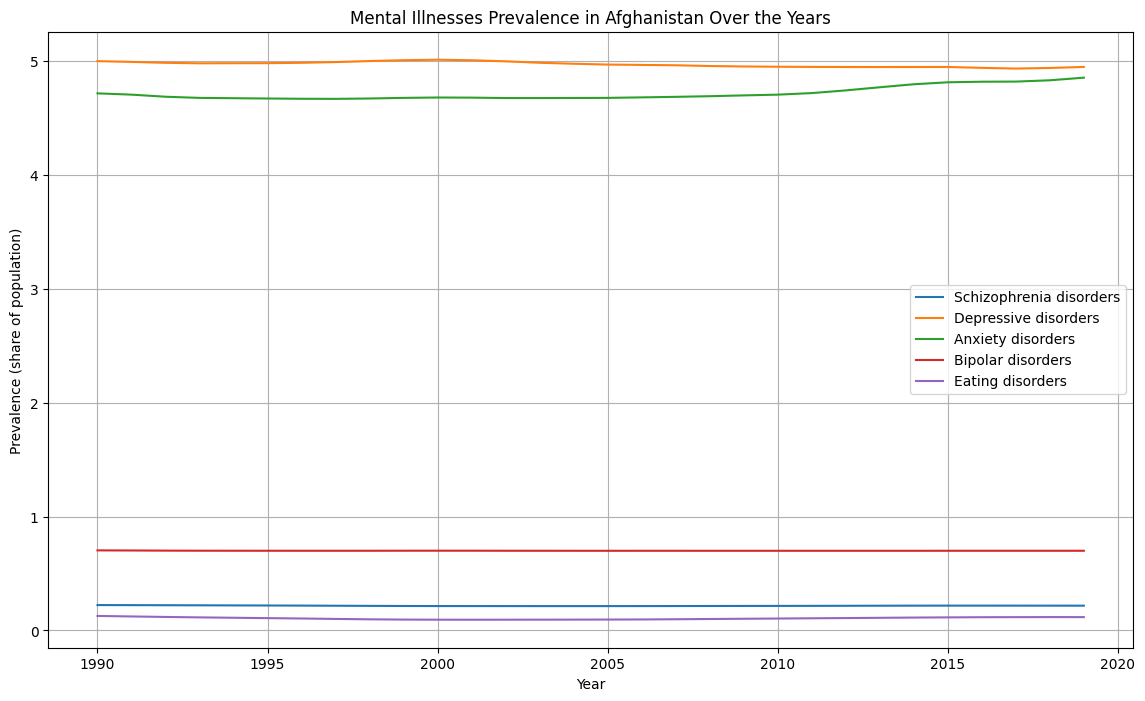

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DataV/1- mental-illnesses-prevalence.csv')

# Filter data for a specific country (e.g., Afghanistan)
country = 'Afghanistan'
country_data = df[df['Entity'] == country]

# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(country_data['Year'], country_data['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Schizophrenia disorders')
plt.plot(country_data['Year'], country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Depressive disorders')
plt.plot(country_data['Year'], country_data['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Anxiety disorders')
plt.plot(country_data['Year'], country_data['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Bipolar disorders')
plt.plot(country_data['Year'], country_data['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'], label='Eating disorders')

plt.xlabel('Year')
plt.ylabel('Prevalence (share of population)')
plt.title(f'Mental Illnesses Prevalence in {country} Over the Years')
plt.legend()
plt.grid(True)
plt.show()

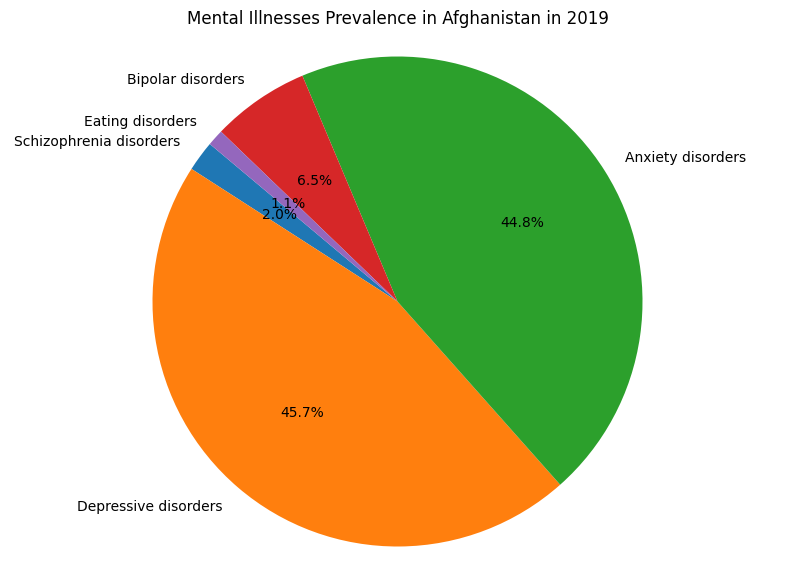

In [42]:
# Summarize the data for a specific year (e.g., 2019) and specific country (e.g., Afghanistan)
year = 2019
country = 'Afghanistan'
country_data = df[(df['Entity'] == country) & (df['Year'] == year)]

# Extract the values for the pie chart
labels = ['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']
sizes = [
    country_data['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0],
    country_data['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].values[0]
]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Mental Illnesses Prevalence in {country} in {year}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()